In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from plotnine import *

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
sales=pd.read_csv('data/SalesData.csv')
sales.head()

,Retailer country,Order method type,Product line,Product type,Date,Quantity,Price,Revenue,Unit Cost
0,France,Telephone,Computer,Laptop,1/1/16,56,1397.94,78284.61,772.36
1,United States,Telephone,Computer,Laptop,1/1/16,89,1397.94,124416.61,724.83
2,Brazil,Web,Mobile,Iphone,1/1/16,23,924.64,21266.70,518.72
3,Mexico,Sales visit,Mobile,Samsung,1/1/16,48,750.79,36037.80,472.25
4,China,Web,Mobile,Samsung,1/1/16,77,643.86,49577.40,388.57


In [4]:
sales.shape

(72743, 9)

In [5]:
sales.dtypes

Retailer country      object
Order method type     object
Product line          object
Product type          object
Date                  object
Quantity               int64
Price                float64
Revenue              float64
Unit Cost            float64
dtype: object

In [6]:
#What is the average revenue of the retailers?
sales['Revenue'].mean()

14692.431852824393

In [7]:
sales.Revenue.mean()

14692.431852824393

In [8]:
np.mean(sales['Revenue'])

14692.431852824393

In [9]:
#What is the median revenue of the retailers and the median price of the products?
sales[['Revenue','Price']].median()

Revenue    7207.20
Price        81.03
dtype: float64

In [10]:
#What is the mode of the retailer countries?
sales['Retailer country'].mode() #categorical variable

0    United States
Name: Retailer country, dtype: object

In [11]:
sales[['Revenue','Price']].describe()

,Revenue,Price
count,72743.000000,72743.000000
mean,14692.431853,172.478608
std,21840.109318,264.424999
min,20.400000,1.800000
25%,3091.500000,33.220000
50%,7207.200000,81.030000
75%,16754.400000,173.885000
max,434271.340000,1746.400000


In [12]:
sales.describe() #only quantitative variables

,Quantity,Price,Revenue,Unit Cost
count,72743.000000,72743.000000,72743.000000,72743.000000
mean,180.454009,172.478608,14692.431853,100.085596
std,339.118000,264.424999,21840.109318,154.866555
min,1.000000,1.800000,20.400000,0.990000
25%,45.000000,33.220000,3091.500000,19.110000
50%,82.000000,81.030000,7207.200000,45.480000
75%,179.000000,173.885000,16754.400000,101.600000
max,13575.000000,1746.400000,434271.340000,1104.760000


In [13]:
sales.describe(include='all')

,Retailer country,Order method type,Product line,Product type,Date,Quantity,Price,Revenue,Unit Cost
count,72743,72743,72743,72743,72743,72743.000000,72743.000000,72743.000000,72743.000000
unique,14,8,5,18,1096,NaN,NaN,NaN,NaN
top,United States,Web,Video Games,Games,5/2/16,NaN,NaN,NaN,NaN
freq,8360,55832,32038,18594,156,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,180.454009,172.478608,14692.431853,100.085596
std,NaN,NaN,NaN,NaN,NaN,339.118000,264.424999,21840.109318,154.866555
min,NaN,NaN,NaN,NaN,NaN,1.000000,1.800000,20.400000,0.990000
25%,NaN,NaN,NaN,NaN,NaN,45.000000,33.220000,3091.500000,19.110000
50%,NaN,NaN,NaN,NaN,NaN,82.000000,81.030000,7207.200000,45.480000
75%,NaN,NaN,NaN,NaN,NaN,179.000000,173.885000,16754.400000,101.600000


In [14]:
sales.agg({'Revenue':['mean','median','std'],'Price':['mean','median','std']})

,Revenue,Price
mean,14692.431853,172.478608
median,7207.200000,81.030000
std,21840.109318,264.424999


In [15]:
stats_list=['mean','median','std']
sales.agg(stats_list)

/var/folders/bv/tjw7sh3d1lj6gk27nrnx7xh80000gn/T/ipykernel_47591/2199144463.py:2: FutureWarning: ['Retailer country', 'Order method type', 'Product line', 'Product type', 'Date'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.


,Quantity,Price,Revenue,Unit Cost
mean,180.454009,172.478608,14692.431853,100.085596
median,82.000000,81.030000,7207.200000,45.480000
std,339.118000,264.424999,21840.109318,154.866555


In [16]:
#What is the average revenue for each category of product line?
sales.groupby('Product line').Revenue.mean()

Product line
Books              1328.048351
Computer          33942.380046
Home & Kitchen    15990.358725
Mobile            15641.397427
Video Games       12928.230530
Name: Revenue, dtype: float64

In [17]:
sales.groupby('Product line').mean()

,Quantity,Price,Revenue,Unit Cost
Product line,,,,
Books,162.945328,10.449213,1328.048351,5.122852
Computer,126.555126,592.682142,33942.380046,339.445061
Home & Kitchen,286.982134,120.483568,15990.358725,58.613283
Mobile,188.789978,177.990195,15641.397427,109.653427
Video Games,169.167270,130.415918,12928.230530,74.836692


In [18]:
#What is the number of products in each category of product line?
sales.groupby('Product line')['Product line'].count()

Product line
Books              7170
Computer           6467
Home & Kitchen     6213
Mobile            20855
Video Games       32038
Name: Product line, dtype: int64

In [19]:
sales.groupby('Product line')['Product line'].count().sort_values(ascending=False)

Product line
Video Games       32038
Mobile            20855
Books              7170
Computer           6467
Home & Kitchen     6213
Name: Product line, dtype: int64

In [20]:
#What is the number of products in each category of product type under each category of product line?
sales.groupby(['Product line','Product type'])['Product type'].count()
#multiindex

Product line    Product type        
Books           Paper books               934
                ebooks                   6236
Computer        Computer Accessories     1307
                Desktop                  1021
                Laptop                   2412
                Screen                    837
                Storage                   890
Home & Kitchen  Bedding & Bath            222
                Heating & Cooling        1911
                Home Décor               3052
                Home Improvement          444
                Kitchen                   584
Mobile          Accessories             11149
                Headphone                5186
                Iphone                   1194
                Samsung                  3326
Video Games     Accessories              4624
                Consoles                 8820
                Games                   18594
Name: Product type, dtype: int64

In [52]:
sales.groupby(['Product line','Product type'])['Product type'].count().sort_values(ascending=False).sort_index(level='Product line',sort_remaining=False)

Product line    Product type        
Books           ebooks                   6236
                Paper books               934
Computer        Laptop                   2412
                Computer Accessories     1307
                Desktop                  1021
                Storage                   890
                Screen                    837
Home & Kitchen  Home Décor               3052
                Heating & Cooling        1911
                Kitchen                   584
                Home Improvement          444
                Bedding & Bath            222
Mobile          Accessories             11149
                Headphone                5186
                Samsung                  3326
                Iphone                   1194
Video Games     Games                   18594
                Consoles                 8820
                Accessories              4624
Name: Product type, dtype: int64

In [26]:
sales_2 = (sales.assign(count = lambda x: x.groupby(['Product line','Product type'])['Product type'].transform('count')))
sales_2

,Retailer country,Order method type,Product line,Product type,Date,Quantity,Price,Revenue,Unit Cost,count
0,France,Telephone,Computer,Laptop,1/1/16,56,1397.94,78284.61,772.36,2412
1,United States,Telephone,Computer,Laptop,1/1/16,89,1397.94,124416.61,724.83,2412
2,Brazil,Web,Mobile,Iphone,1/1/16,23,924.64,21266.70,518.72,1194
3,Mexico,Sales visit,Mobile,Samsung,1/1/16,48,750.79,36037.80,472.25,3326
4,China,Web,Mobile,Samsung,1/1/16,77,643.86,49577.40,388.57,3326
...,...,...,...,...,...,...,...,...,...,...
72738,China,Web,Books,ebooks,12/31/18,270,6.52,1759.28,3.05,6236
72739,Japan,Web,Books,ebooks,12/31/18,146,6.50,949.62,3.37,6236
72740,India,Web,Books,ebooks,12/31/18,107,6.51,696.11,2.99,6236
72741,United States,Web,Books,ebooks,12/31/18,239,6.51,1556.20,3.10,6236


In [27]:
fig = (ggplot(sales_2, aes(x = 'Product line', y = 'count', fill = 'Product line', group = 'Product line')) +
    geom_col() +
    theme_light() +
    theme(plot_title = element_text(hjust = 0.5, size = 20),
          axis_title = element_text(size = 15),
          legend_title = element_blank(),
          legend_text = element_text(size = 12)) +
     ylab("Count") +
     xlab("Product Line") +
     ggtitle("Count of Product Lines"))

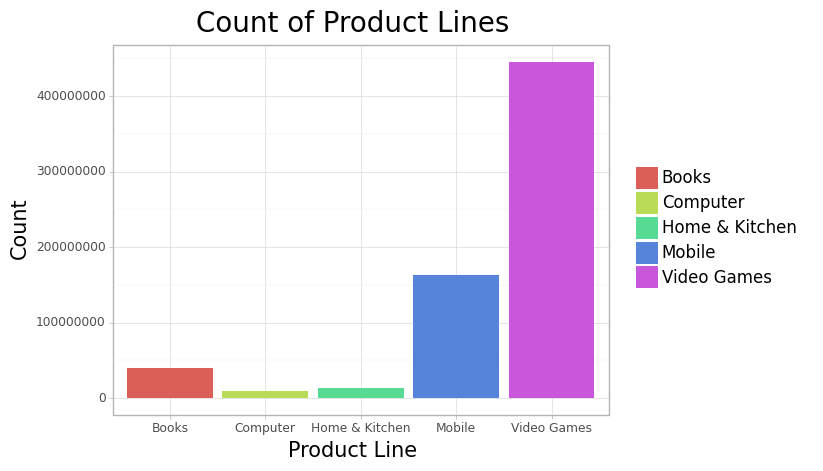

<ggplot: (8776531070371)>

In [29]:
fig